In [1]:
#Importing the Libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
import os
os.chdir('D:/python internship/PYTHON/Data Sets')

In [4]:
#importing the dataset
data=pd.read_csv('SocialNetworkAds.csv')

In [5]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
#Checking the head of our datatset
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
#Checking the structure of our data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Purchased', ylabel='count'>

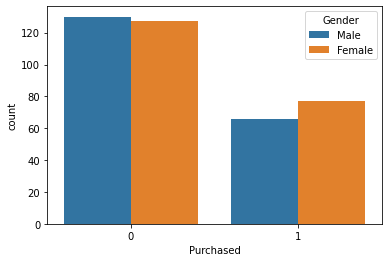

In [8]:
#Explotory Data Analysis
#Counting the Number of person purchased the car or not and diving them by their gender
sns.countplot(data['Purchased'],hue=data['Gender'])

<AxesSubplot:>

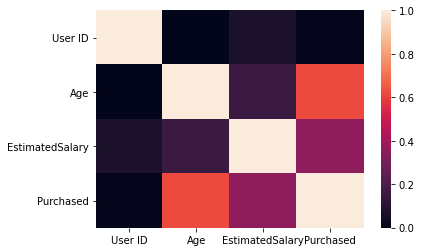

In [9]:
#Visualize the dataset
sns.heatmap(data.corr())

D:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

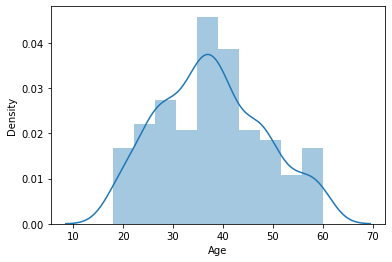

In [10]:
#Cheking the pattern of the Age of the persons of our dataset
sns.distplot(data['Age'])

<AxesSubplot:ylabel='Density'>

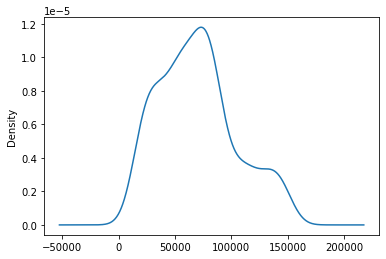

In [11]:
#Analysing the pattern of the estimated salary of the persons in our dataset
data['EstimatedSalary'].plot(kind='kde')

In [12]:
#train test split
#Diving the data into train and test spilt
from sklearn.model_selection import train_test_split
X=data[['Age','EstimatedSalary']]
y=data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
#features Scaling 
#Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
# Training the model using K-nearest neighbours on the  datatset to obtain better accuarcy
from sklearn.neighbors import KNeighborsClassifier

In [15]:
#Making the object of the knn model 
#taking number of neighnbours as 5 intailly we can tweak this parameters
#depending upon the need.
knn_model=KNeighborsClassifier(n_neighbors=5)

In [16]:
#Fitting the model to our train dataset to train our model
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [17]:
#Making Predictions from our Model
knn_predictions=knn_model.predict(X_test)

In [18]:
#Checking the performace of the model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
#Evaluating the Performance of our Model 
print('Confusion Matrix - \n',confusion_matrix(y_test,knn_predictions))
print('\n')
print('Classification Report - \n',classification_report(y_test,knn_predictions))
print('\n')
print('Accuracy Of Our Model -',accuracy_score(y_test,knn_predictions))

Confusion Matrix - 
 [[73  6]
 [ 4 37]]


Classification Report - 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



Accuracy Of Our Model - 0.9166666666666666


In [20]:
#Visualize the Train set results:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train


In [21]:
x1,x2=np.meshgrid(np.arange(start = X_set[:,0].min() - 1 ,stop = X_set[:,0].max() + 1,step =0.01),
                 np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


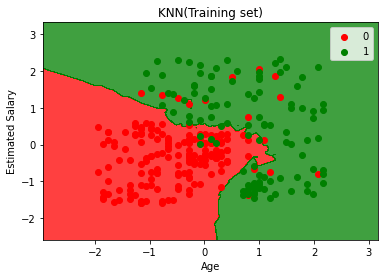

In [22]:
plt.contourf(x1,x2,knn_model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set ==j,1],
               c = ListedColormap(('red','green'))(i),label=j)
plt.title('KNN(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [23]:
#Visualize the Test set results:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test

In [24]:
x1,x2=np.meshgrid(np.arange(start = X_set[:,0].min() - 1 ,stop = X_set[:,0].max() + 1,step =0.01),
                 np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1, step = 0.01))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


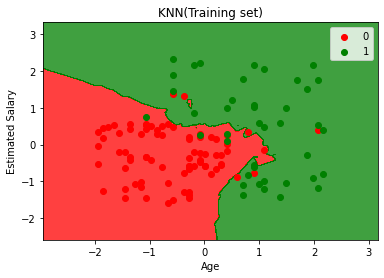

In [25]:
plt.contourf(x1,x2,knn_model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set ==j,1],
               c = ListedColormap(('red','green'))(i),label=j)
plt.title('KNN(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [26]:
# Create ROC curve for the model
import sklearn.metrics as metrics

# calculate the fpr and tpr for all thresholds of the classification
probs =knn_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

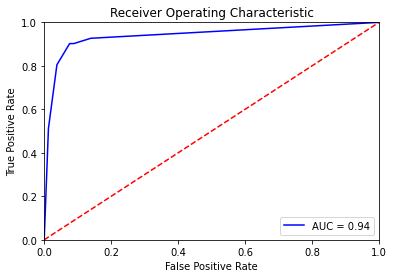

In [27]:
# PLOT ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()